<center>
<h1> Wilson The Cryptohamster </h1>
<h2>Trading Cryptocurrency with the Power of a cute Syrian Hamster</h2>
<hr>
<h1>Exploratory Data Analysis</h1>
<hr>
</center>

In this Notebook, we explore the raw data created from the hamster wheel sensor. The goals are as follows:

1. Determine the parameters used for the decision process (e.g., timeout between two wheel runs, speed, distance).
2. Find out how much Wilson travels on a usual night.

# Install dependencies

In [1]:
%pip install pandas numpy matplotlib seaborn pymysql

You should consider upgrading via the '/Users/HeikoKromer/.pyenv/versions/3.10.3/envs/wilsonisahamster/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pymysql
import seaborn as sns
pd.options.mode.chained_assignment = None


In [3]:
# Database connection strings
DATABASE = 'cryptohamster'
HOST = '192.168.1.105'
PORT = 3306
TABLE = 'hamsterwheel'
FULL_PATH_TO_CREDENTIALS = './../credentials.cred'

In [4]:
# Load credentials to connect to db
with open(FULL_PATH_TO_CREDENTIALS) as f:
    lines = f.readlines()
    f.close()
user = lines[0].split(':')[1].strip()
password = lines[1].split(':')[1].strip()

mysql_connection = pymysql.connect(
    host=HOST,
    user=user,
    password=password,
    db=DATABASE,
    port=PORT,
    charset='utf8'
)
                    
query = "SELECT * FROM hamsterwheel"
df = pd.read_sql(
    sql=query,
    con=mysql_connection,
    index_col='hamsterwheel_id'
)

/Users/HeikoKromer/.pyenv/versions/3.10.3/envs/wilsonisahamster/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
df.dtypes

time    datetime64[ns]
flag             int64
dtype: object

In [6]:
df.sort_values(by=['time'], ascending=False).head()

,time,flag
hamsterwheel_id,,
13352,2022-05-29 12:44:57.034052,1
13351,2022-05-29 12:44:57.013182,1
13350,2022-05-29 12:44:56.992235,1
13349,2022-05-29 12:44:56.272928,1
13348,2022-05-29 12:44:56.252046,1


In [7]:
df['diff'] = (df['time'] - df['time'].shift(1))
df['diff_ms'] = df['diff'].dt.total_seconds() * 1e3
df['diff_s'] = df['diff'].dt.total_seconds()
print(df.shape)
df.head()

(13352, 5)


,time,flag,diff,diff_ms,diff_s
hamsterwheel_id,,,,,
1,2022-05-10 20:15:21.322404,1,NaT,NaN,NaN
2,2022-05-10 20:15:21.339877,1,0 days 00:00:00.017473,17.473,0.017473
3,2022-05-10 20:15:21.361067,1,0 days 00:00:00.021190,21.190,0.021190
4,2022-05-10 20:15:21.515871,1,0 days 00:00:00.154804,154.804,0.154804
5,2022-05-10 20:15:21.537691,1,0 days 00:00:00.021820,21.820,0.021820


In [14]:
threshold = 
m = df['diff_s'] < threshold
df = df.loc[m]
df.shape

(13323, 5)

In [ ]:
df[df['diff_s'] > threshold].shape

<AxesSubplot:xlabel='diff_s', ylabel='Count'>

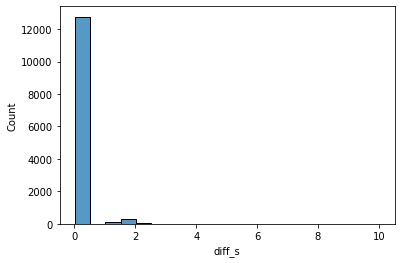

In [15]:
sns.histplot(data=df, x='diff_s', binwidth=0.5)

<AxesSubplot:xlabel='diff_s'>

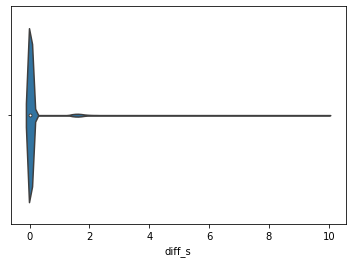

In [16]:
sns.violinplot(x=df["diff_s"])